**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Domingo 03 de octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Eduardo Madrigal Marín
- Gabriel Vargas Rodríguez





___

# Parte 1  -  Ejercicio
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (Concrete_Data - USAR)-
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: **Cement**.
- Debe comentar ampliamente su código
- El profesor hará el rol del **cliente** por si tiene consultas sobre el conjunto de datos.


### Sobre este dataset 

Name -- Data Type -- Measurement -- Description

- id -- quantitative -- integer
- Cement -- quantitative -- kg in a m3 mixture 
- Blast Furnace Slag -- quantitative -- kg in a m3 mixture 
- Fly Ash -- quantitative -- kg in a m3 mixture 
- Water -- quantitative -- kg in a m3 mixture 
- Superplasticizer -- quantitative -- kg in a m3 mixture 
- Coarse Aggregate -- quantitative -- kg in a m3 mixture 
- Fine Aggregate -- quantitative -- kg in a m3 mixture 
- Age -- quantitative -- Day (1~365) 
- Concrete compressive strength -- quantitative -- MPa 


### 1 (10 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats # Q-Q plot
from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from feature_engine.outliers import OutlierTrimmer
from sklearn.linear_model import Lasso

In [45]:
# loads file as a DataFrame
data = pd.read_csv('Concrete_Data - USAR.csv', header = 0, sep=';') # index_col = 0
print(data.head(5)) # shows first 5 registers to check if everything is loaded correctly

   id  cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   1   540.0    0.0     0.0  162.0            2500.0           1040.0   
1   2   540.0    0.0     0.0  162.0               2.5           1055.0   
2   3   332.5  142.5     0.0  228.0               0.0            932.0   
3   4   332.5  142.5     0.0  228.0               0.0            932.0   
4   5   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  


## Visualización General

Primero, obtenemos datos como cuartiles, promedio, total, mínimo, máximo... para obtener una idea general de cómo andan los datos para cada variable

In [46]:
data.describe() # calculates general info for each variable

,id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1008.000000,1030.000000,1030.000000,1030.000000
mean,515.500000,281.167864,73.895825,54.188350,181.567282,119.511165,973.067163,773.580485,45.662136,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,3017.404502,77.667244,80.175980,63.169912,16.705742
min,1.000000,102.000000,0.000000,0.000000,121.800000,-100.000000,801.000000,594.000000,1.000000,2.330000
25%,258.250000,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,515.500000,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,772.750000,350.000000,142.950000,118.300000,192.000000,10.300000,1029.400000,824.000000,56.000000,46.135000
max,1030.000000,540.000000,359.400000,200.100000,247.000000,96000.000000,1145.000000,992.600000,365.000000,82.600000


A primera vista, podemos ver un comportamiento extraño para la variable 'superplasticizer', pues presenta una desviación estándar mucho mayor a las de las otras variables. Además, al tratarse de una medida de peso, llama la atención que hayan valores negativos y valores tan altos como la máxima: 96000. Estos valores parecen ser outliers, pues distan muchísimo de los valores encapsulados entre los cuartiles calculados.

Notamos también que la variable 'coarseaggregate' parece tiene valores faltantes, pues presenta 1008 valores, mientras que el resto de variables presentan 1030, resultanto en un total de 22 valores faltantes.

Vemos que los valores para id van de 1 a 1030 sin repetición (promedio = 515.5) y sin valores faltantes. Esto, junto con información del cliente nos indica que es utilizado solo para identificar filas.

Por último, notamos que no hay ninguna información de fecha o tiempo, siendo 'age' una métrica más y no un 'timestamp'. Además, el cliente indica que id se utiliza solo para identificar y no implica ninguna información adicional, por lo cual se concluye que no se trata de una serie de tiempo.

## Relación entre variables
Luego, analizamos la correlación entre las variables mediante una matriz de correlación, la cuál representamos con un heatmap para facilitar la visualización y comprensión. Mientras más cercano el valor a 1 o -1, más importante es la relación entre las dos variables.

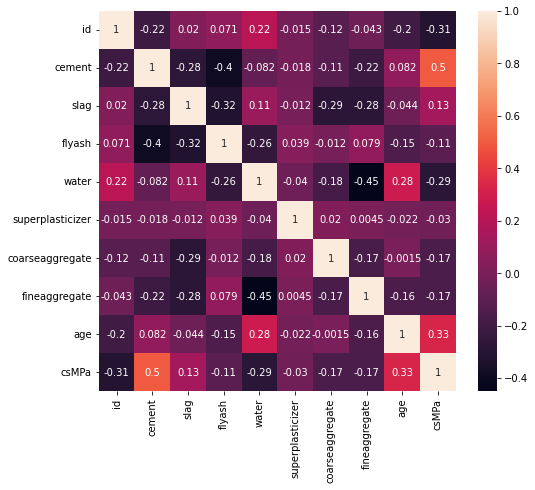

In [47]:
plt.subplots(figsize=(8,7)) # sets size for plot
sn.heatmap(data.corr(), annot=True) # calculates correlation matrix and sets it as input for heatmap
plt.show()

Notamos que las variables son independientes entre sí. Cabe resaltar la importante correlación entre 'csMPa' y 'cement', así como la relación entre 'flyash' y 'cement'. Tanto 'csMPa' como 'flyash' podrían ser útiles para el modelo que se llegue a seleccionar. 

## Distribución de variables
Se visualiza también las distribuciones de las variables, lo cual puede aportar información valiosa si se requiere realizar algún tipo de imputación, por ejemplo. Se utilizan histogramas y Q-Q plots para determinar si las variables poseen una distribución normal o 'skewed'.

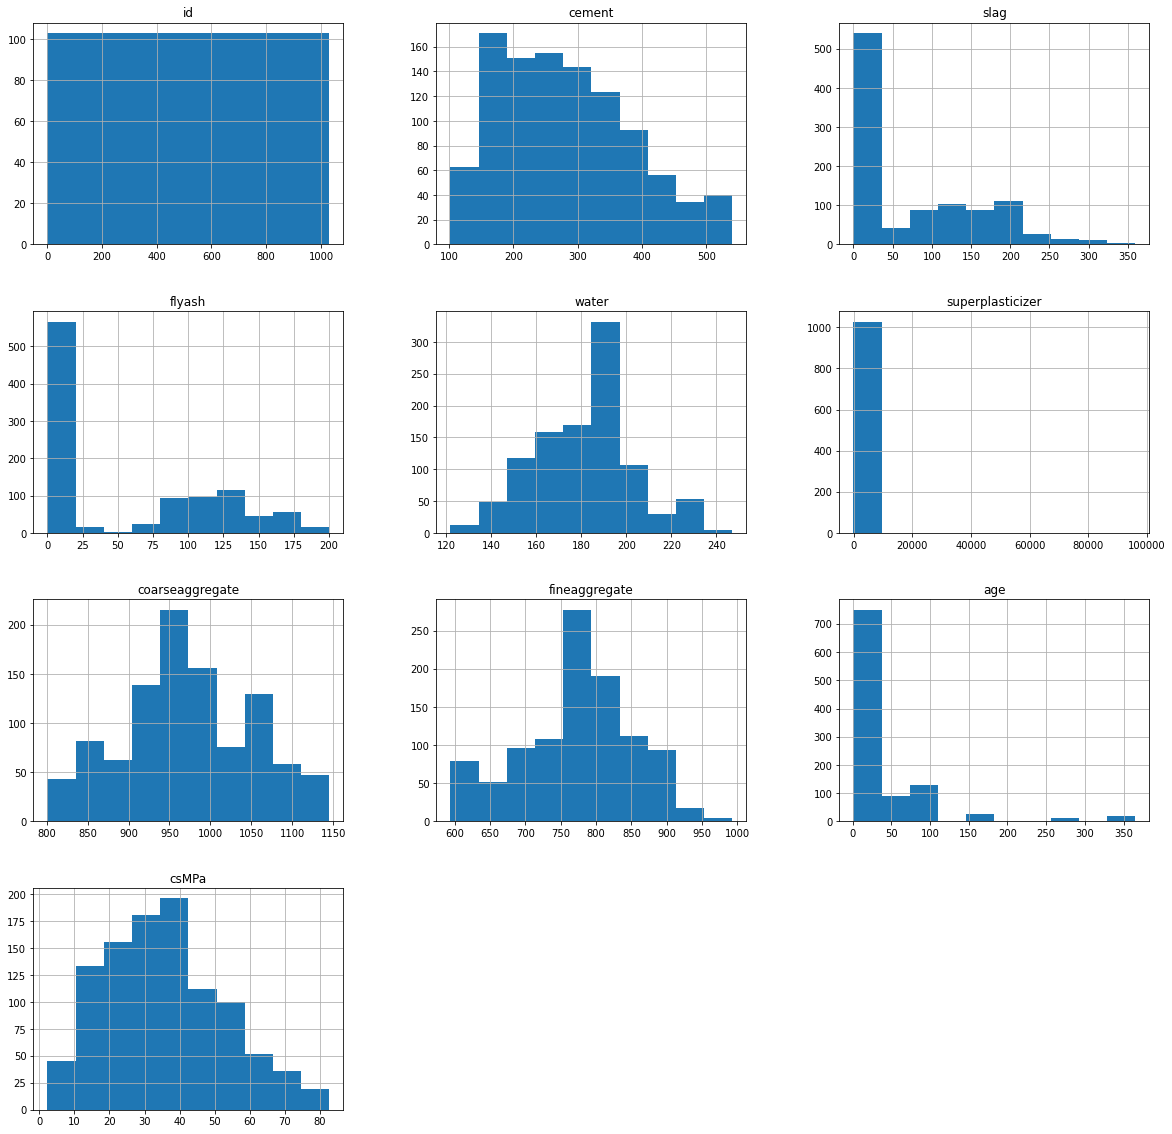

In [48]:
data.hist(figsize=(20,20)) # calculates and graphs histograms for each of the variables
plt.show()

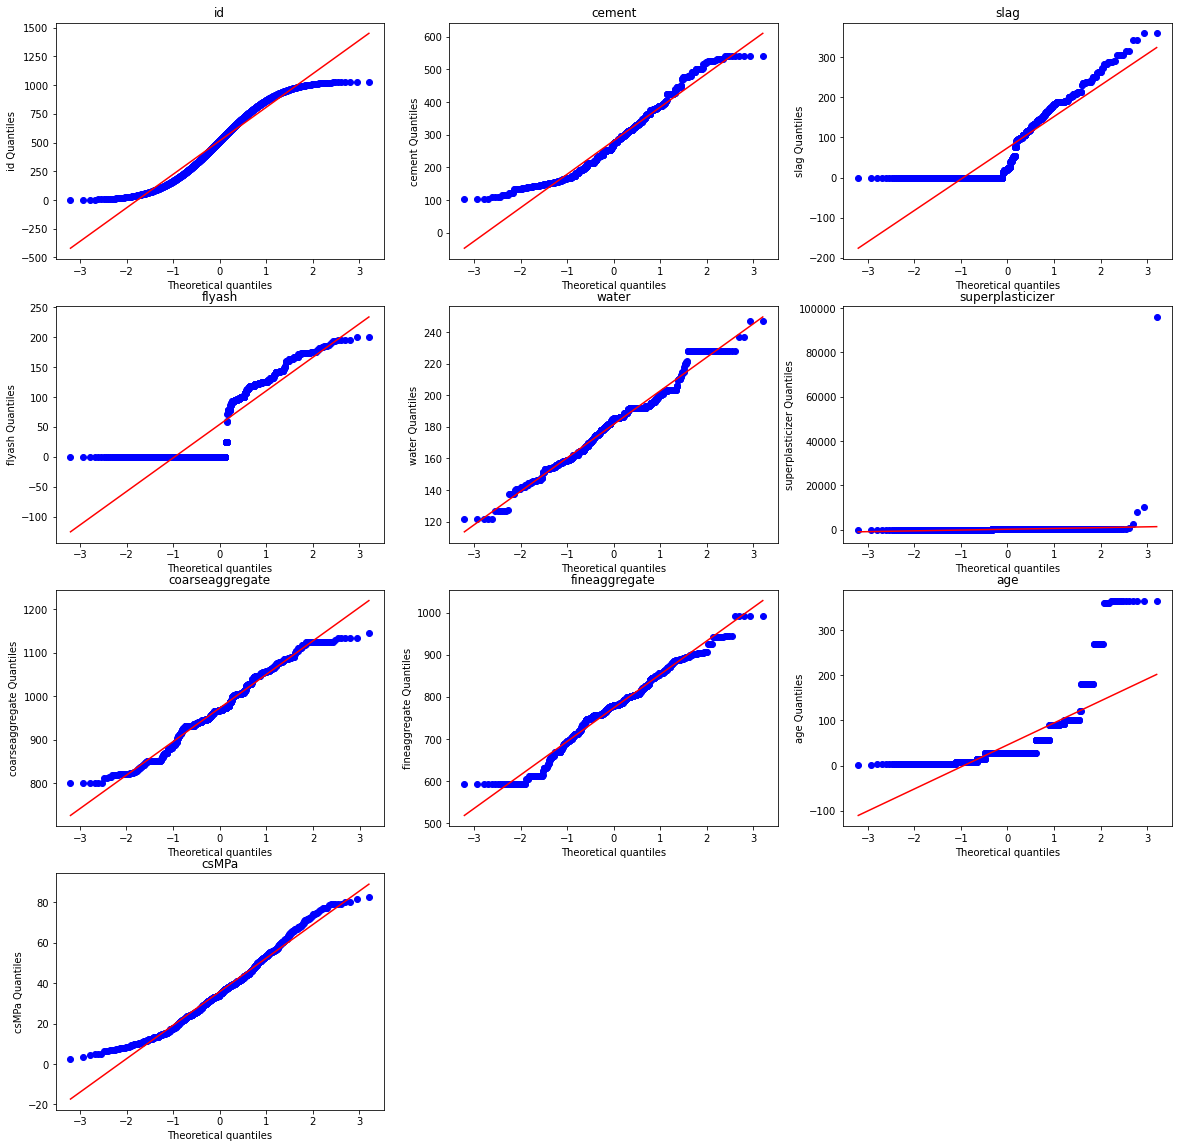

In [49]:
p = 1 # plot counter, starts in 1 to ignore id
plt.figure(figsize=(20,20)) # sets size for whole figure
for i in data:
    plt.subplot(4,3,p) # assigns location for subplot
    p = p + 1
    # calculates Q-Q plot between the variable's and normal distribution
    stats.probplot(data[i].dropna(), dist="norm", plot=plt) 
    plt.title(i)
    plt.ylabel(f'{i} Quantiles')

Concluimos que las siguientes variables poseen una distribución cercana a la normal:
- Water
- Coarseaggregate
- Fineaggregate
- csMPa

Mientras que las siguientes variables poseen una distribución skewed inclinadas a la izquierda, con cola a la derecha:
- Slag
- Flyash
- Age
- Cement

Por causa de los outliers, no tenemos todavía siguiente información para conocer con certeza la distribución de 'superplasticizer', pero pareciera seguir una distribución normal. Esto lo podremos verificar a la hora de tratar los outliers. 

Por otro lado, podemos ver que la variable id representa un contador. El cliente confirmó, además, que la variable se utiliza exclusivamente para identificar cada fila.

## Missing Values
Procedemos a estudiar más a fondo los valores faltantes.

In [50]:
print(f'Total null: {data["coarseaggregate"].isnull().sum()}') # total null values for 'coarseaggregate'
data.isnull().mean() # promedio de valores faltantes para cada variable

Total null: 22


id                  0.000000
cement              0.000000
slag                0.000000
flyash              0.000000
water               0.000000
superplasticizer    0.000000
coarseaggregate     0.021359
fineaggregate       0.000000
age                 0.000000
csMPa               0.000000
dtype: float64

In [51]:
# MCAR
data[data.isnull().any(axis=1)] # obtenemos las filas que cuentan con null values en 'coarseaggregate'

,id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
5,6,266.0,114.0,0.0,228.0,0.0,NaN,670.0,90,47.03
29,30,475.0,0.0,0.0,228.0,0.0,NaN,594.0,7,38.60
77,78,425.0,106.3,0.0,153.5,16.5,NaN,887.1,3,33.40
101,102,388.6,97.1,0.0,157.9,12.1,NaN,925.7,7,34.90
197,198,194.7,0.0,100.5,165.6,7.5,NaN,905.9,56,33.96
269,270,231.8,0.0,121.6,174.0,6.7,NaN,778.5,3,15.44
341,342,297.2,0.0,117.5,174.8,9.5,NaN,753.5,28,47.40
413,414,173.8,93.4,159.9,172.3,9.7,NaN,746.6,3,15.82
437,438,173.5,50.1,173.5,164.8,6.5,NaN,793.5,28,38.20
485,486,387.0,20.0,94.0,157.0,14.3,NaN,845.0,28,50.24


Podemos observar, tal y como se evidenció en la descripción general de los datos, que la columna 'coarseaggregate' es la única que posee valores faltantes (22 en total). Las filas con valores faltantes representan un 2.1% de las filas del dataset. Además, podemos observar que estos valores son faltantes de forma completamente aleatorea, pues no se encuentra ninguna relación o patrón entre las filas de 'coarseaggregate' con valores faltantes y los valores de las otras variables.

## Outliers
A continuación, se presentan gráficos boxplot, así como una tabla comparativa para los rangos esperados de cada variable (según el cliente) para poder detectar outliers.

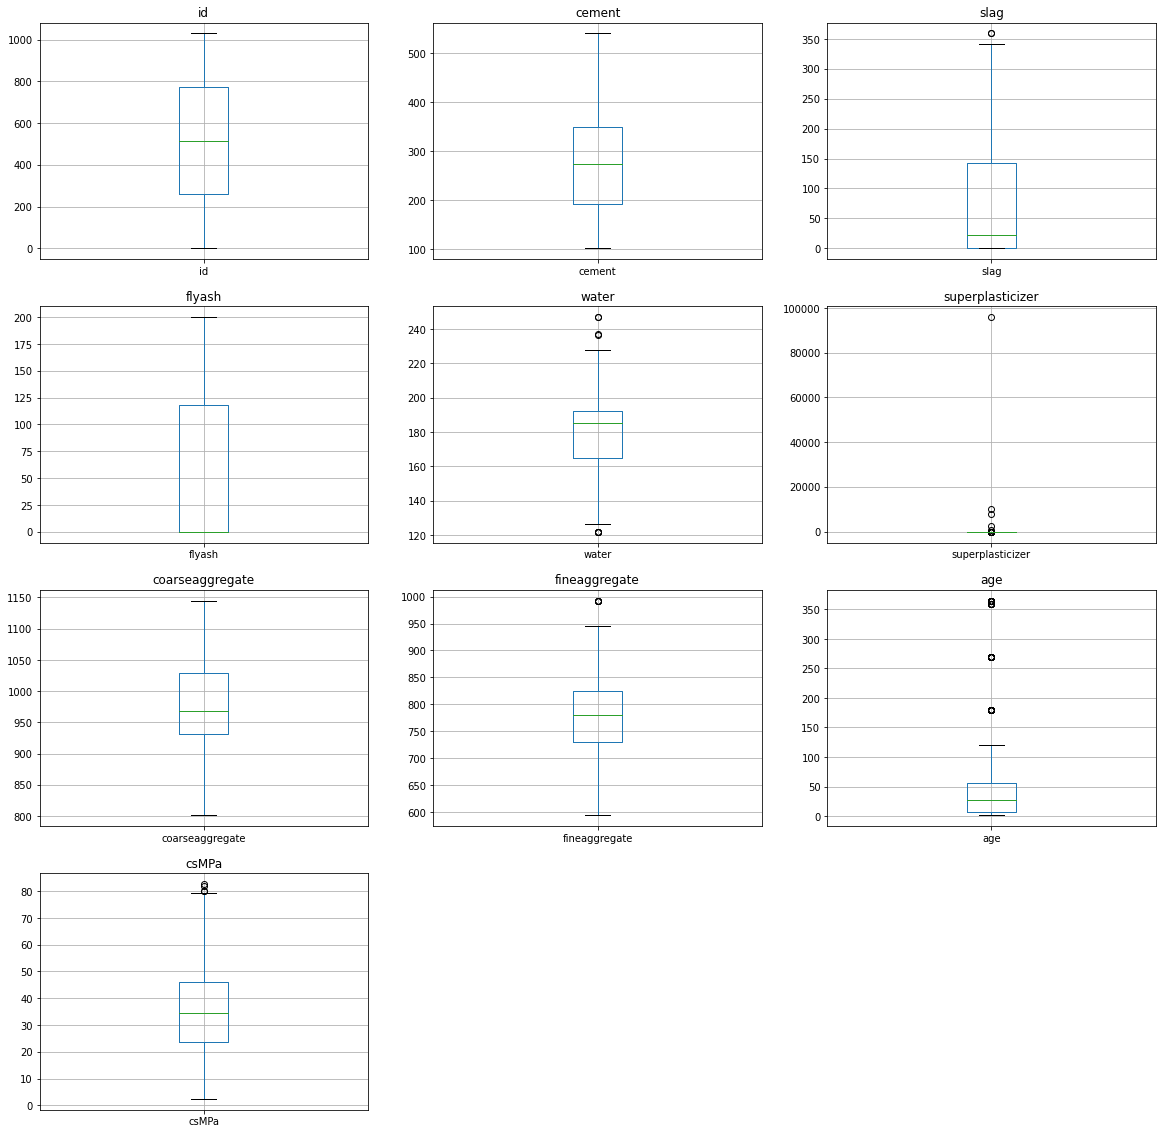

In [52]:
p = 1 # plot counter, starts in 1 to ignore id
plt.figure(figsize=(20,20)) # sets size for whole figure
for i in data:
    plt.subplot(4,3,p) # assigns subplot index
    plt.title(i)
    p = p + 1
    data.boxplot([i]) # calculates boxplot for the specified variable

In [53]:
# id is not taken into account since the client specified that it is only used
# for identification. Furthermore, we can see that the variable counts from 1 to 1030 
# without missing any values in the initial description of data
range_columns = data.columns[1:] # column names excluding id

# ranges specified by client
client_min = [102.0, 0.0, 0.0, 121.8, 0.0, 801.0, 594.0, 1, 2.33] 
client_max = [540, 359.4, 200.1, 247.0, 32.2, 1145.0, 992.6, 365, 82.6]

# ranges found in data
data_min = [i for i in data.min()[1:]]
data_max = [i for i in data.max()[1:]]

# columns for dataframe
idx = ['data_min', 'client_min', 'data_max', 'client_max']

# builds dataframe to compare ranges in data
ranges = pd.DataFrame(data=[data_min, client_min, data_max, client_max], 
                     index=idx, columns=range_columns)
ranges.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
data_min,102.0,0.0,0.0,121.8,-100.0,801.0,594.0,1.0,2.33
client_min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0,2.33
data_max,540.0,359.4,200.1,247.0,96000.0,1145.0,992.6,365.0,82.60
client_max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.60


Si bien en los boxplot podemos ver que son varias las variables que presentan valores atípicos, estos están dentro de los rangos especificados y permitidos por el cliente, razón por la cual podrían incluso llegar a brindar información valiosa a nuestro modelo. 

La excepción, tal y como se observaba desde la descripción general de los datos, es 'superplasicizer', la cual presenta outliers importantes. Consultando con el cliente, se determinó que estos se deben a errores a la hora de registrar la información.

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


A continuación, se separan los datos en conjuntos de Train/Validation y Test, y se muestran las 5 primeras filas de cada conjunto. Se decide hacer un shuffle de los datos ya que sabemos que no estamos lidiando con una serie temporal. Además, la aleatoreidad aporta al modelo, separando cualquier distribución extraña de filas y aportando una mejor muestra para el estudio y elaboración del modelo. Además, se proporciona una semilla (random_state) constante para asegurar que el experimento sea repetible.

In [54]:
from sklearn.model_selection import train_test_split

# separate dataframe into X and Y for model
Y = pd.DataFrame(data['cement'])
X = data.drop(columns=['cement'])

# data is split into train/validation and test sets
X_trainVal, X_test, Y_trainVal, Y_test = train_test_split(X, Y, 
                                                    test_size=0.30, 
                                                    shuffle=True,
                                                    random_state=42 #seed
                                                    )

# visualization of the amount of columns and rows left in each set
print(f'X_trainVal: {X_trainVal.shape} \tY_trainVal: {Y_trainVal.shape}')
print(f'X_test:     {X_test.shape} \tY_test:     {Y_test.shape}')

X_trainVal: (721, 9) 	Y_trainVal: (721, 1)
X_test:     (309, 9) 	Y_test:     (309, 1)


In [55]:
print('\n\nX_trainVal:')
X_trainVal.head(5)



X_trainVal:


,id,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
196,197,0.0,100.5,165.6,7.5,1006.4,905.9,28,25.72
631,632,0.0,0.0,184.0,0.0,1063.0,783.0,7,17.54
81,82,212.5,0.0,155.7,14.3,852.1,880.4,3,25.20
526,527,19.0,141.0,154.0,10.9,942.0,801.0,3,23.64
830,831,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76


In [56]:
print('X_test:')
X_test.head(5)

X_test:


,id,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
31,32,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
109,110,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
136,137,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
88,89,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
918,919,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54


In [57]:
print('Y_trainVal:')
Y_trainVal.head(5)

Y_trainVal:


,cement
196,194.7
631,325.0
81,318.8
526,359.0
830,162.0


In [58]:
print('Y_test:')
Y_test.head(5)

Y_test:


,cement
31,266.0
109,362.6
136,389.9
88,362.6
918,145.0


### 3  (15 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

## Missing values

Lidiamos primero con los valores faltantes del dataset.

In [59]:
X_trainVal['coarseaggregate'].isnull().mean() # mean of missing values for 'coarseaggregate'

0.016643550624133148

Dado que la cantidad de filas con valores nulos para 'coarseaggregate' (única columna con valores nulos) equivale a un ~1.7% de los datos y que dichos valores son MCAR, optamos por eliminar dichos registros. Esto porque el eliminarlos no afecta la distribución de los datos y porque son muy pocos los valores que faltan. Una imputación, por ejemplo, implicaría un poco más de procesamiento y podría afectar la distribución de los datos.

In [60]:
# drops rows with null values in 'coarseaggregate'
X_trainVal_nona = X_trainVal.dropna(subset=['coarseaggregate'])

# compares dataset before and after drop
print(f'shape before: {X_trainVal.shape}')
print(f'shape after: {X_trainVal_nona.shape}')

shape before: (721, 9)
shape after: (709, 9)


In [61]:
X_trainVal_nona.isnull().any() # checks to see if there are any null values remaining in new data set

id                  False
slag                False
flyash              False
water               False
superplasticizer    False
coarseaggregate     False
fineaggregate       False
age                 False
csMPa               False
dtype: bool

A continuación, realizamos una comparación entre las distribuciones para el dataset antes y después de la eliminación de los valores faltantes. El hecho de que el gráfico se vea morado muestra que las distribuciones están completamente traslapados: la distribución original no cambió.

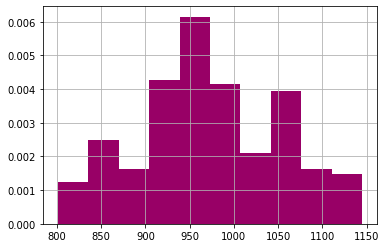

In [62]:
X_trainVal['coarseaggregate'].hist(density=True, color='blue') # histogram for data before
X_trainVal_nona['coarseaggregate'].hist(color='red', density=True, alpha=0.6) # histogram for data after
plt.show()

## Outliers
Ahora, lidiamos con los valores atípicos. Según la tabla presentada anteriormente con los rangos permitidos por el cliente, solo 'superplasticizer' presentaba valores atípicos. 

Primero, analizamos cuántos outliers hay en dicha variable en el conjunto de train/validation para luego decidir cómo lidiar con ellos.

In [63]:
# queries all rows where 'superplasticizer' is outside of the specified range
query = 'superplasticizer < 0 | superplasticizer > 32.2'
outliers = X_trainVal_nona.query(query) 
print('Cantidad:', outliers.shape[0]) # amount of rows with outliers in 'superplasticizer'
outliers # rows with outliers in 'superplasticizer'

Cantidad: 5


,id,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1,0.0,0.0,162.0,2500.0,1040.0,676.0,28,79.99
364,365,53.8,121.9,155.6,96000.0,1014.3,780.6,3,18.02
1014,1015,206.5,160.9,178.9,550.0,866.9,735.6,28,33.31
267,268,0.0,124.8,159.0,7800.0,1085.4,799.5,56,45.08
121,122,118.8,0.0,181.1,-100.0,852.1,781.5,28,68.30


In [64]:
# calculates the amount of outliers + null values in the train/validation set and the percentage they represent
deletable = outliers.shape[0] + (X_trainVal.shape[0]-X_trainVal_nona.shape[0])
print('Porcentaje de valores a borrar:', deletable/X_trainVal.shape[0] * 100)

Porcentaje de valores a borrar: 2.3578363384188625


Dado que entre valores nulos y valores atípicos no se pasa de un ~2.4% de los datos del conjunto, se decide borrar los valores atípicos.

In [65]:
# rows with outliers are dropped
X_trainVal_prep = X_trainVal_nona.drop(outliers.index)

In [66]:
# final description for preprocessed data
X_trainVal_prep.describe()

,id,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,520.166193,75.301847,51.728409,181.898153,6.166477,973.321023,771.413068,46.411932,36.173423
std,296.894039,87.958197,63.536279,21.291501,6.083404,78.592916,80.154526,62.210176,16.757930
min,2.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,252.750000,0.000000,0.000000,166.350000,0.000000,932.000000,723.850000,14.000000,23.972500
50%,524.000000,22.000000,0.000000,185.700000,6.000000,967.100000,778.450000,28.000000,35.090000
75%,775.250000,145.000000,115.700000,192.000000,10.225000,1040.000000,821.250000,56.000000,46.285000
max,1029.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


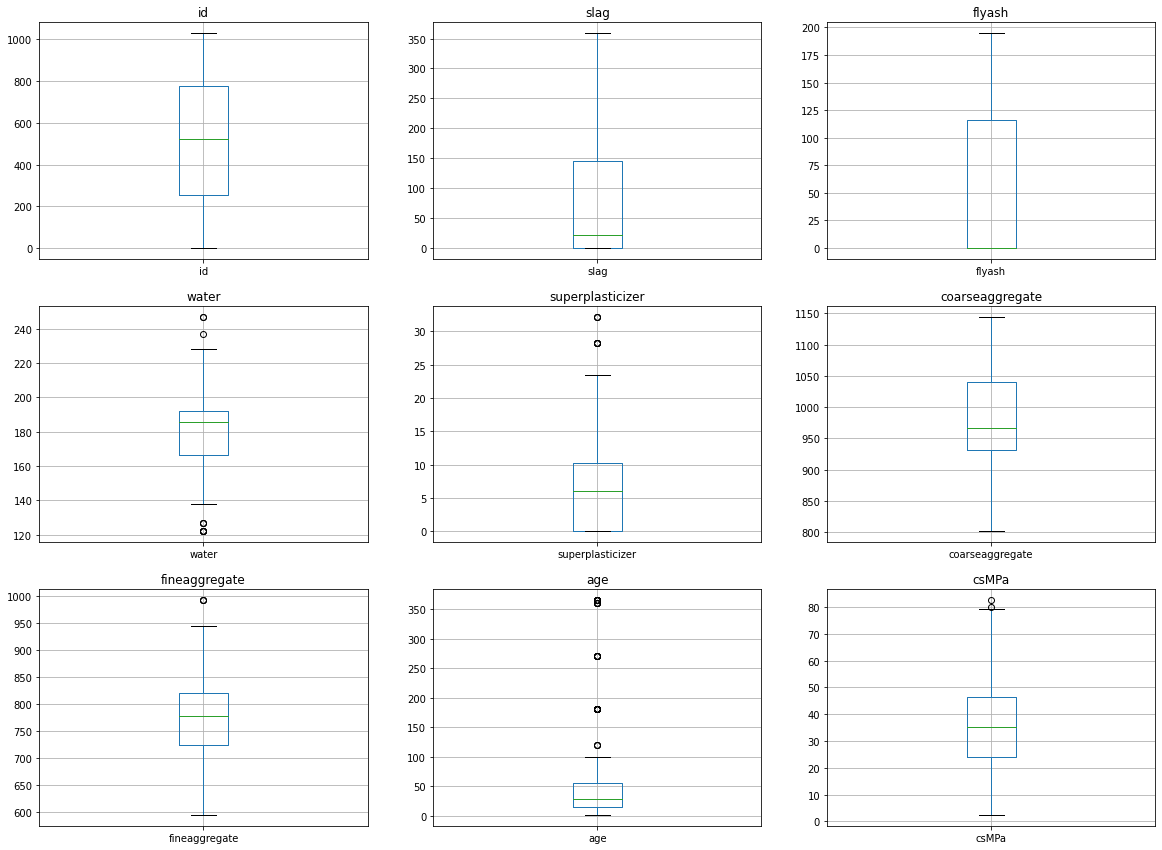

In [67]:
p = 1 # plot counter, starts in 1 to ignore id
plt.figure(figsize=(20,20)) # sets size for whole figure
for i in X_trainVal_prep:
    plt.subplot(4,3,p) # assigns subplot index
    plt.title(i)
    p = p + 1
    X_trainVal_prep.boxplot([i]) # calculates boxplot for the specified variable

### 4 (10 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- ¿Qué hará con el atributo denominado: "Id"?
- Comente sus conclusiones.


## Feature engineering
Dado que el cliente indica que la variable 'id' se utiliza solo para identificar filas, se elimina la columna. Esto porque no aporta información útil para el modelo, es decir, el 'id' no sirve para predecir un valor para 'cement'

In [68]:
X_trainVal_prep.drop(columns='id', inplace=True) # drops column 'id'
X_test = X_test.drop(columns='id') # drops column 'id'
X_trainVal_prep # shows new dataset

,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
196,0.0,100.5,165.6,7.5,1006.4,905.9,28,25.72
631,0.0,0.0,184.0,0.0,1063.0,783.0,7,17.54
81,212.5,0.0,155.7,14.3,852.1,880.4,3,25.20
526,19.0,141.0,154.0,10.9,942.0,801.0,3,23.64
830,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
...,...,...,...,...,...,...,...,...
871,187.0,0.0,176.0,11.0,990.0,789.0,28,32.76
87,200.9,0.0,144.7,11.2,1004.6,803.7,3,24.40
330,0.0,125.1,143.3,12.0,1086.8,800.9,14,42.22
466,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56


Procedemos a utilizar métodos filter y embedded para informar la selección de variables para el modelo.

In [69]:
Y_trainVal = Y_trainVal.loc[X_trainVal_prep.index] # rows eliminated from X are eliminated from Y

In [70]:
# mutual info is applied to see how much information is provided by each variable
# the smaller the value, the less information it is believed to provides for cement prediction 
selector = mutual_info_regression(X_trainVal_prep, Y_trainVal.cement) # applies filter

# presents results as a dataframe
pd.DataFrame(data = [selector], columns = X_trainVal_prep.columns, index = ['metric']) 

,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
metric,1.783918,1.474408,2.013877,1.511892,2.037476,2.041721,0.114639,0.248818


In [71]:
# arrays for result storage
results = []
r_index = []

# embedded method using Lasso for different hyperparameters
for i in range(-10,6):
    selector = SelectFromModel(Lasso(alpha=10**i, random_state=42)) # selector created with new hyperparameter
    selector.fit(X_trainVal_prep, Y_trainVal) # selector fitted to dataset
    results.append(selector.get_support()) # result saved
    r_index.append(f'10^{i}') # result saved

# presents results as a dataframe
pd.DataFrame(data = results, index = r_index, columns = X_trainVal_prep.columns)

,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
10^-10,True,True,True,True,True,True,True,True
10^-9,True,True,True,True,True,True,True,True
10^-8,True,True,True,True,True,True,True,True
10^-7,True,True,True,True,True,True,True,True
10^-6,True,True,True,True,True,True,True,True
10^-5,True,True,True,True,True,True,True,True
10^-4,True,True,True,True,True,True,True,True
10^-3,True,True,True,True,True,True,True,True
10^-2,True,True,True,True,True,True,True,True
10^-1,True,True,True,True,True,True,True,True


El método filter indica que las variables 'age' y 'csMPa' no aportan casi nada a nuestro modelo, mientras que el método embedded muestra pareciera indicar (para la mayoría de hiperperámetros probados) que estas sí aportan. De acuerdo con la matriz de correlación, la variable 'csMPa' tenía una relación importante con 'cement', por lo cuál decidimos no eliminarla. En cambio, age es desestimada por el método filter y es de las primeras en llegar a ser desestimadas por el método embedded, por lo cuál se decide eliminar dicha variable.

Además, el método embedded no toma como valiosa a superplasticizer en una cantidad significativa de iteraciones. Dado que esta no obtuvo un puntaje alto en el método filter, también se elimina.

In [77]:
X_trainVal_prep.drop(columns=['csMPa', 'superplasticizer'], inplace=True)
X_test = X_test.drop(columns=['csMPa', 'superplasticizer'])

X_trainVal_prep

,slag,flyash,water,coarseaggregate,fineaggregate,age
196,0.0,100.5,165.6,1006.4,905.9,28
631,0.0,0.0,184.0,1063.0,783.0,7
81,212.5,0.0,155.7,852.1,880.4,3
526,19.0,141.0,154.0,942.0,801.0,3
830,190.0,148.0,179.0,838.0,741.0,28
...,...,...,...,...,...,...
871,187.0,0.0,176.0,990.0,789.0,28
87,200.9,0.0,144.7,1004.6,803.7,3
330,0.0,125.1,143.3,1086.8,800.9,14
466,0.0,125.2,166.6,1079.0,798.9,100


### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'Concrete_DataPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


## Escalar los datos

Cómo se puede apreciar en la tabla anterior los valores que toman cada variable son muy diferentes el uno del otro. Por esta razón es muy importante utilizar un método para escalar los datos.

En este caso se utilizará el método de MinMaxScaler. Este método es muy sencillo de utilizar pero se debe tener cuidado con los outliners en los datos. Cómo se aprecia en el punto cuatro, la unica variable con valores atípicos importantes es age pero gracias a la confirmación con el cliente sabemos que los datos son totalmente posibles por lo que al utilizar min max el modelo va a estar preparado para los mismo.

MinMaxScaler sirve pero hay que tener cuidado con los outliners

Se ajusta el escalar con train igual


Hay que revisar los algoritmos para ver si tiene un scale especifico


clase 24-08 escalar datos

fit intercept para el bias

FALTA

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Escalando X con MinMaxScaler
transformer = MinMaxScaler().fit(X_trainVal_prep)
X_trainVal_scaled = transformer.transform(X_trainVal_prep)

X_test_scaled = transformer.transform(X_test)


# Bias
# Appending bias
bias_col = np.ones((len(X_trainVal_scaled),1)) # shape(n,1)
X_trainVal_scaled = np.append(bias_col, X_trainVal_scaled, axis=1)


# Creando el DataFrame para mejor visualización
columns =  np.append(["Bias"], X_trainVal_prep.columns, axis=0)
print(X_trainVal_prep.columns)
X_trainVal_scaled = pd.DataFrame(X_trainVal_scaled, columns= columns)

print("x_trainVal escalado con el bias incluido:")
#print(X_trainVal_scaled[:3,:]) # ! borrar

X_trainVal_scaled

Index(['slag', 'flyash', 'water', 'coarseaggregate', 'fineaggregate', 'age'], dtype='object')
x_trainVal escalado con el bias incluido:


,Bias,slag,flyash,water,coarseaggregate,fineaggregate,age
0,1.0,0.000000,0.515385,0.349840,0.597093,0.782489,0.074176
1,1.0,0.000000,0.000000,0.496805,0.761628,0.474160,0.016484
2,1.0,0.591263,0.000000,0.270767,0.148547,0.718515,0.005495
3,1.0,0.052866,0.723077,0.257188,0.409884,0.519318,0.005495
4,1.0,0.528659,0.758974,0.456869,0.107558,0.368791,0.074176
...,...,...,...,...,...,...,...
699,1.0,0.520312,0.000000,0.432907,0.549419,0.489212,0.074176
700,1.0,0.558987,0.000000,0.182907,0.591860,0.526091,0.005495
701,1.0,0.000000,0.641538,0.171725,0.830814,0.519067,0.035714
702,1.0,0.000000,0.642051,0.357827,0.808140,0.514049,0.271978


### 1.6 (20 puntos)
Presente e implemente un diseño experimental que incluya:
- Cuatro algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Otro el método de regresión RIDGE.
    - Usted eligirá dos métodos más de regresión, que no sean de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para los otros dos métodos, debe usar ten-cross-validation para seleccionar **al menos un hiperparámetro**.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección). Recuerde aspectos como analizar promedios y desviaciones estándar.
    
**Nota:** Para cada uno de los dos algoritmos seleccionados (no el OLSR) explique los parámetros que recibe. 
    

## Algoritmos
A continuación se aplicarán cuatro algoritmos diferentes para compararlos más adelante.

Es importante notar que se utilizará la métrica RMSE para elegir la mejor configuración. Esto debido a que se conoce # ! FALTA
Para mayor facilidad se 

x_train escalado con el bias incluido:
[[1.         0.31719533 0.         0.84824281 0.38081395 0.19066734
  1.        ]
 [1.         0.52587646 0.         0.3442492  0.41773256 0.40592072
  0.01648352]
 [1.         0.52587646 0.         0.19249201 0.41773256 0.40592072
  0.07417582]]


### Mínimos Cuadrados Sin Regularización (OLSR)

In [ ]:
# Clase 31 del 8 min 55

### Regresión RIDGE

### Regresión Algo

### Regresión Algo

### 1.7 (15 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Si tuviera que recomendar un método a usar con este dataset ¿cuál sería de los comparados y por qué?
- Qué conclusiones finales saca sobre los métodos usados como predictores.

___

# Parte 2  -  Temas por grupo (20 puntos)
___

Considere lo siguiente:
1. Revise en el archivo PDF: "Temas por grupo", qué cuadernos jupyter le corresponden a su grupo.
1. Estudie los cuadernos asignados.
1. Prepare un único cuaderno de jupyter (comentando con celdas de texto en español), en que resume y explica las técnicas asignadas. 
1. Prepare un video para una posible presentación de sus temas en clase, no debe durar más 12 minutos en la presentación de los temas asignados (Considere que el material preparado será compartido con sus compañer(a/o)s del curso y por tanto se espera que se esmere en su elaboración y clara explicación -- por favor -- ). 

In [30]:
# 1. Constant features
# 2. Quasi-constant features